In [1]:
import cv2
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

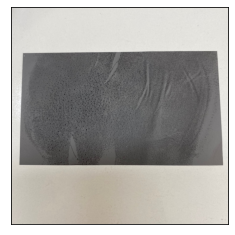

In [2]:
image = cv2.imread('/home/mango/python/Python.study/oil_test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.xticks([])     #x축 눈금 지우기
plt.yticks([])     #y축 눈금 지우기
plt.imshow(image)
plt.show()

In [10]:
image_gray = cv2.imread('/home/mango/python/Python.study/oil_test.jpg', cv2.IMREAD_GRAYSCALE)

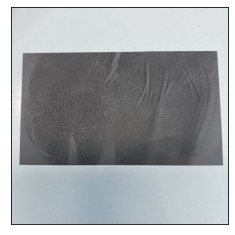

In [4]:
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])
 
plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

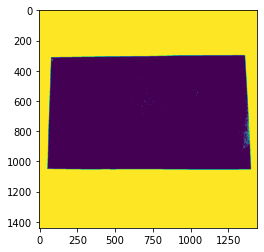

In [12]:
plt.imshow(thresh1)

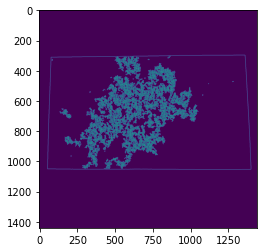

In [13]:
edged = cv2.Canny(blur, 10, 250)
plt.imshow(edged)

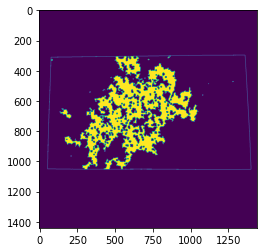

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow( closed)

In [15]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

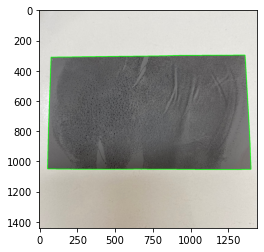

In [16]:
contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.imshow(contours_image)

In [17]:
contours_xy = np.array(contours)
contours_xy.shape

(1, 192, 1, 2)

In [18]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)


56
1400
297
1053


In [19]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

In [20]:
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('org_trim.jpg', img_trim)
org_image = cv2.imread('org_trim.jpg')

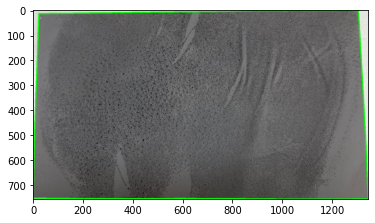

In [21]:
plt.imshow(org_image)

In [22]:
hist, bins = np.histogram(org_image.ravel(), 256,[0,256])

(array([9.3950e+03, 5.0600e+03, 1.4280e+03, 8.0500e+02, 4.6000e+02,
        3.3400e+02, 1.9200e+02, 1.1400e+02, 1.2400e+02, 8.3000e+01,
        1.0200e+02, 1.1700e+02, 1.1600e+02, 1.3800e+02, 1.7500e+02,
        2.5900e+02, 3.2900e+02, 7.0400e+02, 1.0760e+03, 1.0810e+03,
        1.0780e+03, 1.0700e+03, 7.5200e+02, 4.5700e+02, 3.6600e+02,
        3.5100e+02, 3.3600e+02, 3.8400e+02, 4.4900e+02, 5.1800e+02,
        5.6600e+02, 6.3600e+02, 7.3100e+02, 8.3900e+02, 1.0780e+03,
        1.4120e+03, 2.3230e+03, 2.1920e+03, 2.5210e+03, 2.1230e+03,
        2.4520e+03, 1.9470e+03, 1.9320e+03, 1.9760e+03, 2.2820e+03,
        2.4050e+03, 2.6940e+03, 2.8770e+03, 3.3050e+03, 3.7040e+03,
        3.9970e+03, 4.2810e+03, 4.8370e+03, 5.4490e+03, 6.1800e+03,
        6.8360e+03, 7.8700e+03, 8.6720e+03, 9.3360e+03, 9.9720e+03,
        1.0763e+04, 1.1591e+04, 1.2356e+04, 1.3214e+04, 1.4230e+04,
        1.5165e+04, 1.6389e+04, 1.7783e+04, 1.8711e+04, 2.0268e+04,
        2.1448e+04, 2.3003e+04, 2.4535e+04, 2.59

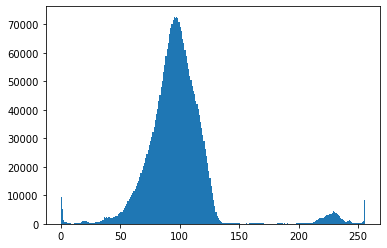

In [23]:
plt.hist(org_image.ravel(),256,[0,256])